In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Final_Dataset.csv', index_col= [0])

numerical = ["CO2 Emissions", "AFF", "Government Effectiveness", "Individuals using the Internet", "Life Expectancy", "Renewable Energy Consumption"]
categorical = ["Country", "Income Group", "Region"]
df

,Country,Income Group,Region,CO2 Emissions,AFF,Government Effectiveness,Individuals using the Internet,Life Expectancy,Renewable Energy Consumption
0,Afghanistan,Low income,South Asia,0.200151,22.042897,-1.453096,60.828447,64.486000,21.422701
1,Albania,Upper middle income,Europe & Central Asia,1.939732,18.440931,0.057240,65.400000,78.458000,38.266399
2,Algeria,Lower middle income,Middle East & North Africa,3.591657,11.840233,-0.527378,49.038468,76.693000,0.193300
3,Andorra,High income,Europe & Central Asia,5.973405,10.393144,1.943918,60.828447,72.210078,18.506001
4,Angola,Lower middle income,Sub-Saharan Africa,0.887380,8.607742,-1.045002,35.000000,60.782000,56.785500
...,...,...,...,...,...,...,...,...,...
188,"Venezuela, RB",Low income,Latin America & Caribbean,4.782755,10.393144,-1.584651,60.828447,72.128000,14.564700
189,Vietnam,Lower middle income,East Asia & Pacific,2.698806,14.681979,-0.001380,69.847929,75.317000,23.491800
190,"Yemen, Rep.",Low income,Middle East & North Africa,0.326682,5.000963,-2.230443,60.828447,66.096000,4.269000
191,Zambia,Lower middle income,Sub-Saharan Africa,0.446065,3.341147,-0.557072,14.299997,63.510000,85.104599


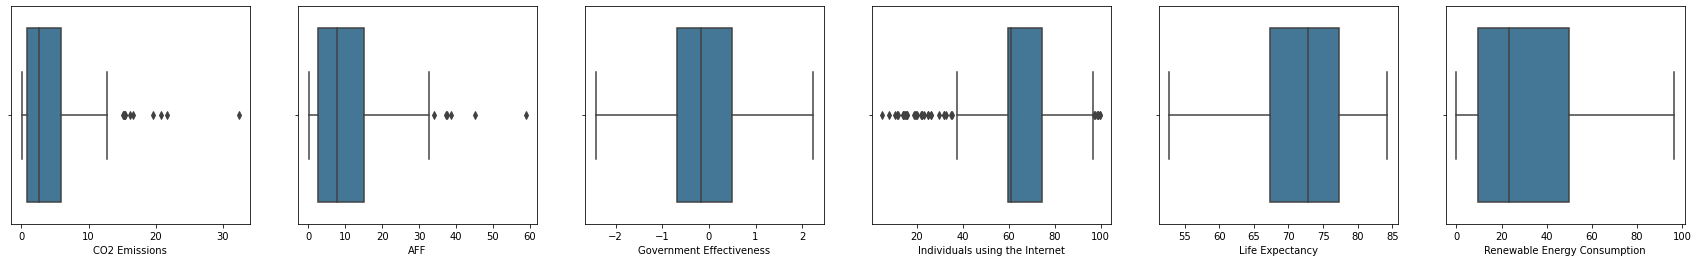

In [19]:
def boxplots(df, numerical):
    fig, axs = plt.subplots(1, len(numerical), figsize=(30, 4))
    for attribute,p in zip(numerical, range(len(numerical)+1)):
        sns.boxplot(data=df, x=attribute, palette="mako", ax=axs[p])
    plt.show()

boxplots(df,numerical)


In [23]:
#the function can be called without print details, to only return a "Gaussian" or "Not Gaussian" string, or can be called with extensive details with print_details = True
def check_gaussian_distribution(dataframe, attribute, alpha, print_details = False):
#Each test looks at the question of whether a sample was drawn from a Gaussian distribution from a slightly different perspective.
#The Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data
#The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution
#Anderson-Darling Test can be used to check whether a data sample is normal;it is a modified version of the more sophisticated nonparametric goodness-of-fit statistical test Kolmogorov-Smirnov
#A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.
	from scipy.stats import shapiro
	from scipy.stats import normaltest
	from scipy.stats import anderson

	data = dataframe[attribute].values
	shapirostat, p = shapiro(data)
	k2stat, l = normaltest(data)
	result = anderson(data)

	for i in range(len(result.critical_values)):
		sl, cv = result.significance_level[i], result.critical_values[i]
	if (print_details == True):
		print("🟢🟢🟢🟢🟢 Normality Tests 🟢🟢🟢🟢🟢")
		print("H0: variable follows a Gaussian distribution\nH1: variable does not follow a Gaussian distribution" )
		print("------------------------------------------")
		print('Shapiro Statistics=%.3f, p=%.3f' % (shapirostat, p))
		if p > alpha:
			print('Shapiro test: Sample looks Gaussian (fail to reject H0)')
		else:
			print('Shapiro test: Sample does not look Gaussian (reject H0)')
		print("------------------------------------------")
		print('K^2 Statistics=%.3f, p=%.3f' % (k2stat, l))
		if l > alpha:
			print('K^2 test: Sample looks Gaussian (fail to reject H0)')
		else:
			print('K^2 test: Sample does not look Gaussian (reject H0)')
		print("------------------------------------------")
		print('Anderson-Darling Statistic: %.3f' % result.statistic)

		if result.statistic < result.critical_values[i]:
			print('%.3f: %.3f, data looks normal from an Anderson-Darling perspective (fail to reject H0)' % (sl, cv))
		else:
			print('%.3f: %.3f, data does not look normal from an Anderson-Darling perspective (reject H0)' % (sl, cv))
		print("------------------------------------------")
		if ((p>alpha) & (l> alpha) & (result.statistic < result.critical_values[i]) ):
			print("All of the normality tests conclude that the attribute " + attribute + " is extracted from a Gaussian distribution")
		
		else:
			print("At least 1 of the normality tests indicate that the attribute " + attribute + " does not follow a Gaussian distribution")
		
	
	#Critical values in a statistical test are a range of pre-defined significance boundaries at which the H0 can be failed to be rejected if
	# the calculated statistic is less than the critical value. 
	# Rather than just a single p-value, the test returns a critical value for a range of different commonly used significance levels.
	if ((p>alpha) & (l> alpha) & (result.statistic < result.critical_values[i])):
		return "Gaussian"
	else:
		return "Not Gaussian"
	


In [25]:
check_gaussian_distribution(df, 'CO2 Emissions', 0.05, True)

🟢🟢🟢🟢🟢 Normality Tests 🟢🟢🟢🟢🟢
H0: variable follows a Gaussian distribution
H1: variable does not follow a Gaussian distribution
------------------------------------------
Shapiro Statistics=0.767, p=0.000
Shapiro test: Sample does not look Gaussian (reject H0)
------------------------------------------
K^2 Statistics=112.231, p=0.000
K^2 test: Sample does not look Gaussian (reject H0)
------------------------------------------
Anderson-Darling Statistic: 11.743
1.000: 1.071, data does not look normal from an Anderson-Darling perspective (reject H0)
------------------------------------------
At least 1 of the normality tests indicate that the attribute CO2 Emissions does not follow a Gaussian distribution


'Not Gaussian'

In [34]:


#the following function will clean the data of outliers by using capping, if they exist, and plot the histogram and boxplot before and after
def cap_outliers(df):
    #normal distribution: The data points which fall below mean-3*(sigma) or above mean+3*(sigma) are outliers; 
    #skewed distribution: The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

    new_df_cap = df.copy()
    for col in numerical:
        varcheck = check_gaussian_distribution(df, col, 0.05)
        if varcheck == "Not Gaussian":   
            percentile25 = df[col].quantile(0.25)
            percentile75 = df[col].quantile(0.75)
            IQR = percentile75 - percentile25

            upper_limit = percentile75 + 1.5 * IQR
            lower_limit = percentile25 - 1.5 * IQR
            
            new_df_cap[col] = np.where(
                new_df_cap[col] > upper_limit,
                upper_limit,
                np.where(
                    new_df_cap[col] < lower_limit,
                    lower_limit,
                    new_df_cap[col]
                        )
                )
        else:  #if the variable follows a normal distribution
            upper_limit = new_df_cap[col].mean() + 3*df[col].std()
            lower_limit = new_df_cap[col].mean() - 3*df[col].std()
            new_df_cap[col] = np.where(
                new_df_cap[col]>upper_limit,
                upper_limit,
                np.where(
                    new_df_cap[col]<lower_limit,
                    lower_limit,
                    new_df_cap[col]
                        )
                )
        plt.figure(figsize=(15,8))
        plt.subplot(2,2,1)
        sns.distplot(df[col])
        plt.subplot(2,2,2)
        sns.boxplot(df[col])
        plt.subplot(2,2,3)
        sns.distplot(new_df_cap[col])
        plt.subplot(2,2,4)
        sns.boxplot(new_df_cap[col])
        plt.show()
    return new_df_cap

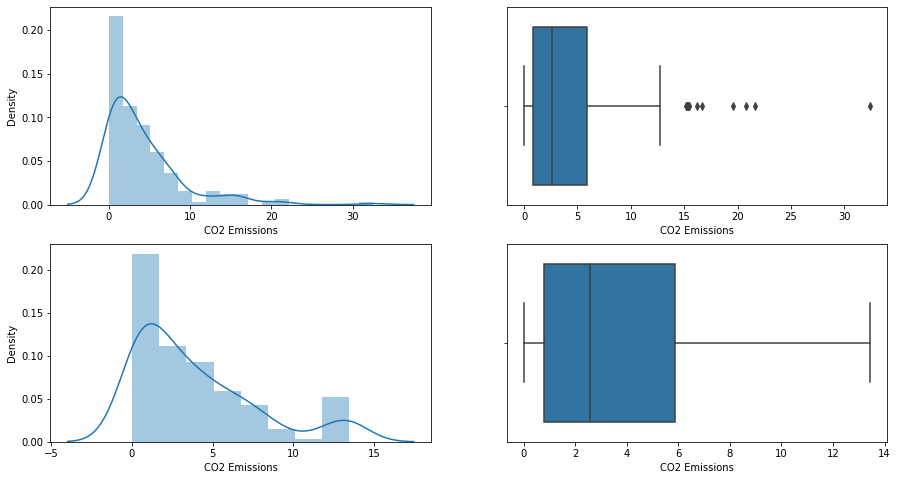

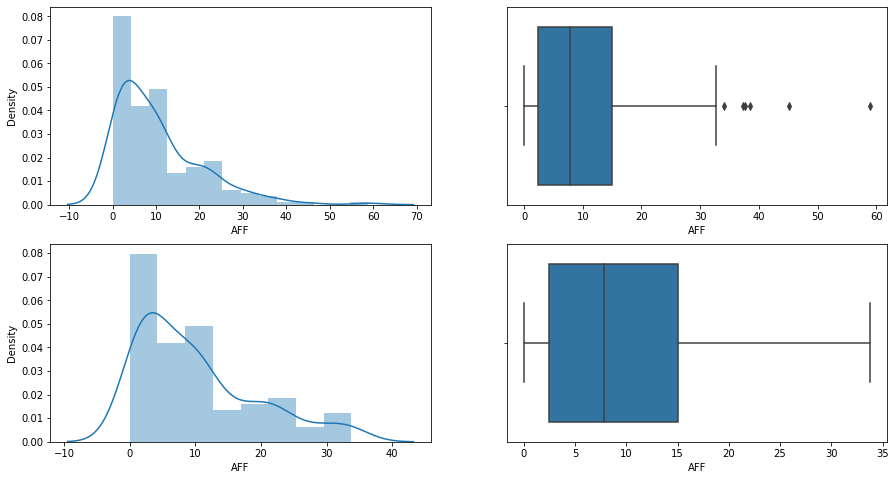

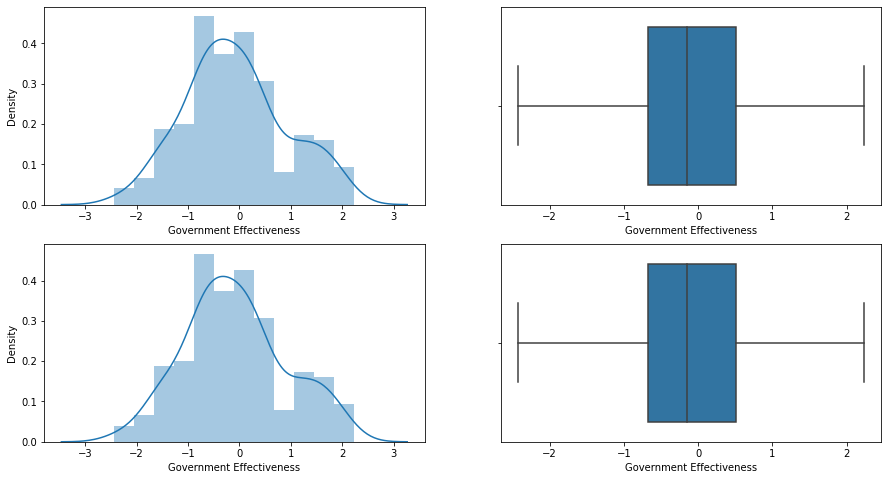

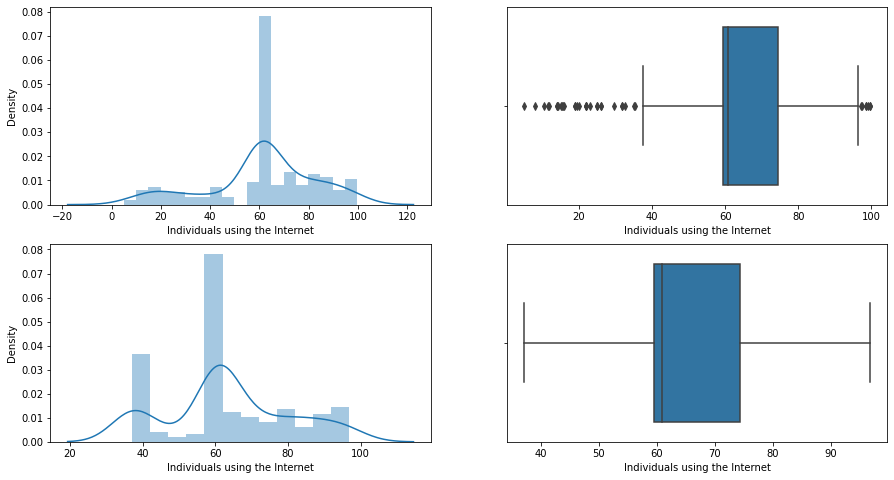

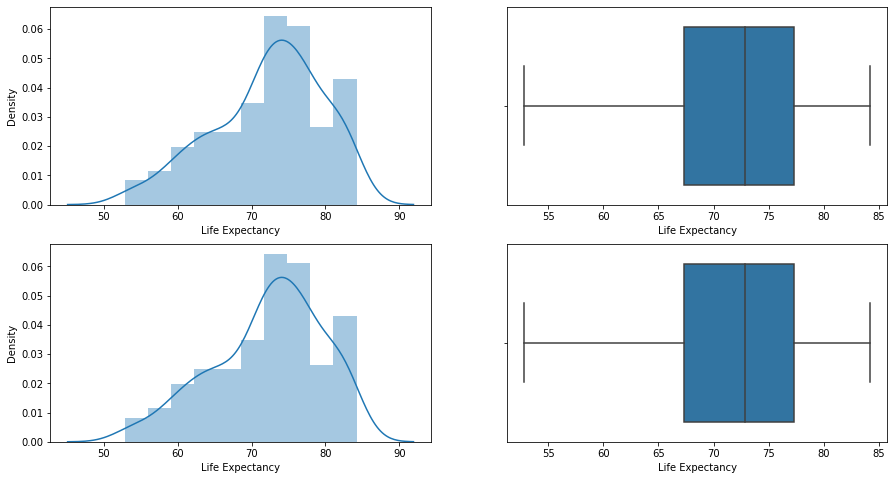

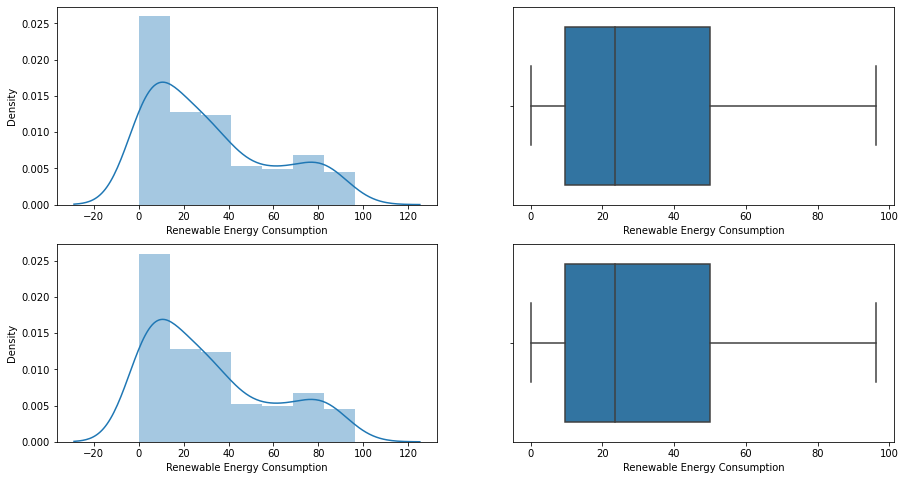

In [35]:
import warnings

warnings.filterwarnings("ignore")

new_df = cap_outliers(df)




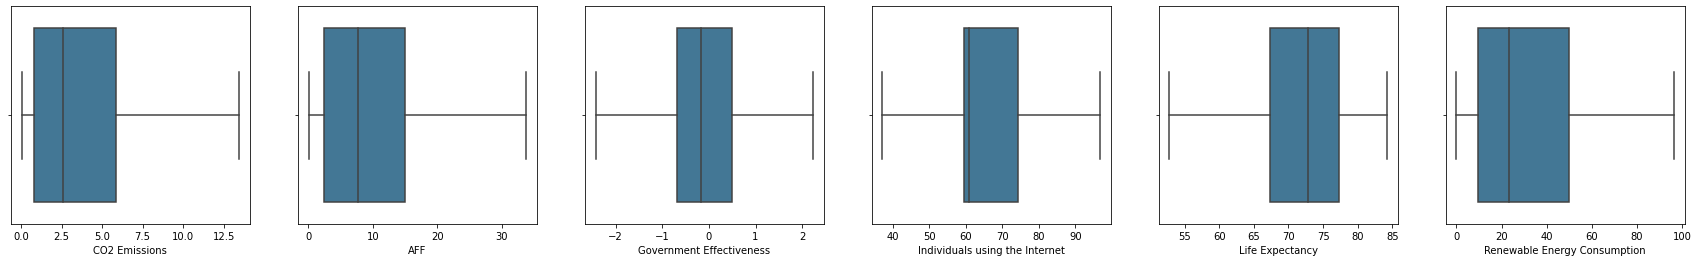

In [36]:
boxplots(new_df, numerical)

In [37]:
new_df.to_csv("NoOutliersDataset.csv")